
<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>CRISP-DM Methodology</center></h3>

* [Buissness Understanding](#1)
* [Data Understanding](#2)
* [Data Preparation](#3)
* [Data Modeling](#4)   
* [Data Evaluation](#5)

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

    1.Determine business objectives

    2.Assess situation

    3.Determine data mining goals

    4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    Tasks
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

    Tasks
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    Tasks

    1.Evaluate Result

    2.Review Process

    3.Determine next steps

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Buissness Understanding</center></h3>

**Goal of the Competition** In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.
    
<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Understanding</center></h3>
    
This is part is done here : 
    
https://www.kaggle.com/bannourchaker/sales-crisp-dm-dataunderstanding-part1
    
## Step 1: Import helpful libraries

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from matplotlib import pyplot
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV

import lightgbm as lgbm
from catboost import CatBoostRegressor
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from itertools import combinations
#import smong 
# Plotlty : 
import pprint
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly import tools
import plotly.io as pio
pp = pprint.PrettyPrinter(indent=4)
pio.templates.default = "plotly_white"

from sklearn.metrics import mean_squared_log_error
import category_encoders as ce
import warnings
import optuna 
warnings.filterwarnings('ignore')

# Time series EDA 


## Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [ ]:
%%time
path = '/kaggle/input/store-sales-time-series-forecasting/'
oil_data = pd.read_csv(path+'oil.csv')
train = pd.read_csv(path+'train.csv', parse_dates = True, low_memory = False)
test = pd.read_csv(path+'test.csv')
submission_sample = pd.read_csv(path+'sample_submission.csv')
holidays_data = pd.read_csv(path+'holidays_events.csv',parse_dates = True, low_memory = False)
store_data =  pd.read_csv(path+'stores.csv')
transaction_data = pd.read_csv(path+'transactions.csv', parse_dates = True, low_memory = False)

# Data collection +Data Curation


In [ ]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train['day'] = pd.DatetimeIndex(train['date']).day
train['day_of_week'] = pd.DatetimeIndex(train['date']).weekday
train['day_name'] = pd.DatetimeIndex(train['date']).day_name()
train['week_of_year'] = pd.DatetimeIndex(train['date']).weekofyear
train['quarter'] = pd.DatetimeIndex(train['date']).quarter
train['season'] = train.month%12 // 3 + 1
train1=reduce_mem_usage(train)

holidays_data['month'] = pd.DatetimeIndex(holidays_data['date']).month
holidays_data['week_of_year'] = pd.DatetimeIndex(holidays_data['date']).weekofyear
holidays_data['quarter'] = pd.DatetimeIndex(holidays_data['date']).quarter
holidays_data['season'] = holidays_data.month%12 // 3 + 1
holidays_data=holidays_data.drop(['date'], axis=1).head()
holidays_data=reduce_mem_usage(holidays_data)
train1 = pd.merge(train1, holidays_data,  how='left', left_on=['month','week_of_year','quarter','season'], right_on = ['month','week_of_year','quarter','season'])
oil_data=reduce_mem_usage(oil_data)
train1 = pd.merge(train1, oil_data,  how='left', left_on=['date'], right_on = ['date'])
store_data=reduce_mem_usage(store_data)
train1 = pd.merge(train1, store_data,  how='left', left_on=['store_nbr'], right_on = ['store_nbr'])
transaction_data=reduce_mem_usage(transaction_data)
train1 = pd.merge(train1, transaction_data,  how='left', left_on=['store_nbr', 'date'], right_on = ['store_nbr','date'])
train1 = train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
del train 
del holidays_data
del transaction_data
del oil_data
del store_data 

In [ ]:
 train1=reduce_mem_usage(train1)

In [ ]:
train1[['holiday_type', 'locale', 'locale_name', 'description', 'transferred']]=train1[['holiday_type', 'locale', 'locale_name', 'description', 'transferred']].fillna('NoEvent')
train1[['dcoilwtico', 'transactions']]=train1[['dcoilwtico', 'transactions']].fillna(np.nan)
train1[train1.select_dtypes(['float64','float16']).columns] = train1[train1.select_dtypes(['float64','float16']).columns].apply(pd.to_numeric)
train1[train1.select_dtypes(['object','int64','int8']).columns] = train1.select_dtypes(['object','int64','int8']).apply(lambda x: x.astype('category'))

### Visual Exploratory 
The first, and perhaps most popular, visualization for time series is the line plot.

## Target Plot  as complet time series 

In [ ]:
# summarize the number of rows with missing values for each column
for i in range(train1.shape[1]):
    # count number of rows with missing values
    n_miss = train1.iloc[:,i].isnull().sum()
    perc = n_miss / train1.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

In [ ]:
cat_columns = train1.drop(['id','date','store_nbr'], axis=1).select_dtypes(exclude=['float64','float16']).columns
num_columns = train1.drop(['id','date','store_nbr'], axis=1).select_dtypes(exclude=['int64','category','int8']).columns

In [ ]:
cat_columns

In [ ]:
sns.countplot(x='cluster', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='store_type', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='state', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='city', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='description', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='transferred', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='locale_name', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='locale', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='holiday_type', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='day_of_week', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='month', data=train1)
plt.xticks(rotation=45) 

In [ ]:
sns.countplot(x='year', data=train1)
plt.xticks(rotation=45)  

In [ ]:
sns.countplot(x='family', data=train1)
plt.xticks(rotation=80)  

In [ ]:
num_columns

In [ ]:

fig = px.line(train1.iloc[0:8000], x='id', y="sales")
fig.show()

In [ ]:
fig = px.scatter(train1.iloc[0:8000], x='id', y="sales")
fig.show()

# Grouped TimeSeries :


In [ ]:
groups = train1.iloc[0:8000].groupby(train1.iloc[0:8000]['store_nbr']).agg(['sum', 'mean', 'max','count'])
groups.head()

In [ ]:
train1.iloc[0:8000].groupby(train1.iloc[0:8000]['store_nbr']).sales.plot(figsize=(10, 6))

# Grouping data according to store

In [ ]:
list_store=train1.groupby(['store_nbr'])
list_store=[list_store.get_group(x) for x in list_store.groups]

* Grouping data based on item for each store

* creating separate file for each item of each store

In [ ]:
for store in list_store:
    store_groups=store.groupby(['family'])
    list_item=[store_groups.get_group(x) for x in store_groups.groups]
    for list_store_item in list_item:
        list_store_item=pd.DataFrame(list_store_item).reset_index(drop=True)
        store_id=list_store_item["store_nbr"][0]
        item_id=list_store_item["family"][0]
        list_store_item.to_csv(f"file_{store_id}_{item_id}.csv",index=None)
        break

In [ ]:
list_store_item["family"][0]

In [ ]:
store1_family1= pd.read_csv('./file_1_AUTOMOTIVE.csv')
store1_family1.head()

#  Time Series Line Plot
The first, and perhaps most popular, visualization for time series is the line plot.

In this plot, time is shown on the x-axis with observation values along the y-axis

In [ ]:
store1_family1.sales.plot()
pyplot.show()

In [ ]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(store1_family1.date.iloc[0:10], 
        store1_family1.sales.iloc[0:10])
plt.show()

In [ ]:
groups = store1_family1.groupby('year')[ 'sales', 'onpromotion', 
       'holiday_type', 'locale', 'locale_name', 'description', 'transferred',
       'dcoilwtico', 'city' ,'store_type', 'cluster', 'transactions'].agg(['sum', 'mean', 'max'])
groups

In [ ]:
store1_family1.groupby('year').sales.plot(figsize=(10, 6))

#  Time Series Histogram and Density Plots
Another important visualization is of the distribution of observations themselves.

This means a plot of the values without the temporal ordering.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

In [ ]:

store1_family1.sales.hist()

We can get a better idea of the shape of the distribution of observations by using a density plot.

This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

In [ ]:
store1_family1.sales.plot(kind='kde')
pyplot.show()

 # Time Series Box and Whisker Plots by Interval
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

In [ ]:
series1=store1_family1.loc[:,['year','sales']]
series2=store1_family1.loc[:,['month','sales']]
series1.groupby('year').boxplot(figsize=(30, 30))

In [ ]:
sns.boxplot(x = 'year', y = 'sales', data = series1)

In [ ]:
sns.boxplot(x = 'month', y = 'sales', data = store1_family1)

In [ ]:
sns.boxplot(x = 'day_of_week', y = 'sales', data = store1_family1)

In [ ]:
plt.figure(figsize=(20,5))
#series=store1_family1[store1_family1.year==2016]
seriesh= store1_family1[["month", "day", "sales"]].pivot_table("sales", "month", "day", aggfunc='mean')

ax = sns.heatmap(seriesh, annot=True,linewidths=.5)

In [ ]:
plt.figure(figsize=(20,5))
#series=store1_family1[store1_family1.year==2016]
seriesh= store1_family1[["year", "day", "sales"]].pivot_table("sales", "year", "day", aggfunc='mean')

ax = sns.heatmap(seriesh, annot=True,linewidths=.5)

In [ ]:
plt.figure(figsize=(20,5))
#series=store1_family1[store1_family1.year==2016]
#days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
#store1_family1['day_of_week'] = store1_family1['day_of_week'].apply(lambda x: days[x])
store1_family1['day_name'] = pd.DatetimeIndex(store1_family1['date']).day_name()
seriesh= store1_family1[["year", "day_name", "sales"]].pivot_table("sales", "year", "day_name", aggfunc='mean')

ax = sns.heatmap(seriesh, annot=True,linewidths=.5)

## Time Series Lag Scatter Plots
Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for pressure  dataset.

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
series3=store1_family1.sales
lag_plot(series3)
pyplot.show()

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore.


First, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value

In [ ]:
from pandas import DataFrame
from pandas import concat
from pandas.plotting import scatter_matrix
plt.figure(figsize=(20,10))
values = DataFrame(series3.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Minimum Daily Temperatures dataset

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series3)
pyplot.show()


The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series3, lags=31)
pyplot.show()

In [ ]:
train_EDA = store1_family1
fig = px.histogram(
    train_EDA, 
    x="sales",
    marginal="box",
    color="locale",
    hover_data=train_EDA.columns,
    nbins = 50
)

fig.update_layout(
    title="sales distribution"
)

fig.show()

In [ ]:
agg = train1.groupby(["year", "store_type"]).agg({"sales"  :"mean", "transactions" : "mean"}).reset_index()
fig = px.box(agg, y="sales", facet_col="store_type", color="store_type",
             boxmode="overlay", points='all')
fig.update_layout(title = "Average Sales Distribution by Store Type")
fig.show()

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Data Preparation</center></h3>

## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling:

Outlier Handling

Scaling

Feature Engineering

Feature Selection 




<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Data Modeling</center></h3>

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

 # Persistence Forecast Model
It is important to establish a baseline forecast. The simplest forecast you can make is to use thecurrent observation (t) to predict the observation at the next time step (t+1). This is calledthe naive forecast or the persistence forecast and may be the best possible model on some timeseries forecast problems.



In [ ]:
# split into train and test sets
# Create lagged dataset
values = DataFrame(store1_family1.sales.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))
X = dataframe.values
train_size = int(len(X) * 0.90)
train, test1 = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test1[:,0], test1[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
test_RMSLE= mean_squared_log_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
print('Test RMSLE{}'.format(test_RMSLE))
# plot predictions and expected results
pyplot.plot(train_y)
#pyplot.plot(test_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

# Autoregressive ForecastModel
Autoregression means developing a linear model that uses observations at previous time steps topredict observations at future time step (automeans self in ancient Greek). Autoregression is aquick and powerful time series forecasting method. The Statsmodels Python library providesthe autoregression model in the AR class1

In [ ]:
from statsmodels.tsa.ar_model import AR
# split dataset
X = store1_family1.sales.values
train, test = X[0:-15], X[-15:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
test_RMSLE= mean_squared_log_error(test, predictions)    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test RMSLE{}'.format(test_RMSLE))
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#  ARIMA Forecast Model
The ARIMA is a classical linear model for time series forecasting. It combines the autoregressivemodel (AR), differencing to remove trends and seasonality, called integrated (I) and the movingaverage model (MA) which is an old name given to a model that forecasts the error, used tocorrect predictions. The Statsmodels Python library provides the ARIMA class2. In this lesson,you will develop an ARIMA model for a standard time series dataset.

Autoregressive Integrated Moving Average Model
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

X = store1_family1.sales.values
train, test = X[0:-15], X[-15:]
# fit model
model = ARIMA(train
              , order=(5,1,0))
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
test_RMSLE= mean_squared_log_error(test, abs(predictions))    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test RMSLE{}'.format(test_RMSLE))
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
submitions=pd.read_csv('../input/store-sales-time-series-forecasting/sample_submission.csv')
basline=pd.read_csv('../input/baseline/BaselineSubmition.csv')
submitions['sales']=basline.sales

submitions.to_csv('BaselineSubmition.csv', index=False)
submitions

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Data Evaluation  </center></h3>






Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).

Regression is different from classification, which involves predicting a category or class label.

Evaluating Regression Models

A common question by beginners to regression predictive modeling projects is:

    How do I calculate accuracy for my regression model?

Accuracy (e.g. classification accuracy) is a measure for classification, not regression.

We cannot calculate accuracy for a regression model.

The skill or performance of a regression model must be reported as an error in those predictions.

This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

Error addresses exactly this and summarizes on average how close predictions were to their expected values.

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

    Mean Squared Error (MSE).
    Root Mean Squared Error (RMSE).
    Mean Absolute Error (MAE)

**Mean Absolute Error**, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

That is, MSE and RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

As its name suggests, the MAE score is calculated as the average of the absolute error values. Absolute or abs() is a mathematical function that simply makes a number positive. Therefore, the difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE.

The MAE can be calculated as follows:

    MAE = 1 / N * sum for i to N abs(y_i – yhat_i)

Where y_i is the i’th expected value in the dataset, yhat_i is the i’th predicted value and abs() is the absolute function.
The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

**The RMSLE is calculated as:**

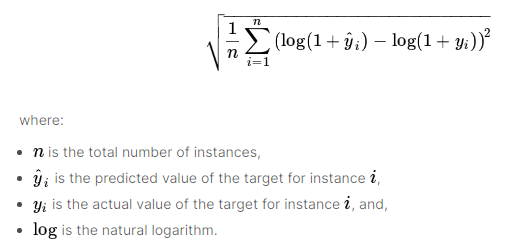

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

**we have done all EDA needed to chose the best preprocessing steps and begin modeling .
Work is in progress to go more in depth with statistical models ..I will post the next notebook soon**  

 ***Upvote if you find it useful*** .
reference : 
Grouped Time Series Data :

prepra data : 
https://www.kaggle.com/manishkumar77/preparing-dataset
feature engnieer :
https://www.kaggle.com/hikmetsezen/base-model-with-lightgbm-on-demand-forecasting

https://www.kaggle.com/haticeebraralc/demand-forecasting


https://www.kaggle.com/ekrembayar/store-item-demand-forecasting-with-lgbm